# Insurance Claims- Fraud Detection

# Problem Statement:

# Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

Downlaod Files:
    
    
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re

In [2]:
#Loading the Dataset.
df=pd.read_csv('fraud_detection.csv')

In [3]:
df.head(50)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [4]:
df.shape

(1000, 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

_c39 has no usable data present. Other columns appear to have no null values.



In [7]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for c in df:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((df[c] == s).sum())

  in months_as_customer =  0
? in months_as_customer =  0
- in months_as_customer =  0
 ? in months_as_customer =  0
 - in months_as_customer =  0
?  in months_as_customer =  0
-  in months_as_customer =  0
 ?  in months_as_customer =  0
 -  in months_as_customer =  0
NA in months_as_customer =  0
N/A in months_as_customer =  0
 NA in months_as_customer =  0
 N/A in months_as_customer =  0
  in age =  0
? in age =  0
- in age =  0
 ? in age =  0
 - in age =  0
?  in age =  0
-  in age =  0
 ?  in age =  0
 -  in age =  0
NA in age =  0
N/A in age =  0
 NA in age =  0
 N/A in age =  0
  in policy_number =  0
? in policy_number =  0
- in policy_number =  0
 ? in policy_number =  0
 - in policy_number =  0
?  in policy_number =  0
-  in policy_number =  0
 ?  in policy_number =  0
 -  in policy_number =  0
NA in policy_number =  0
N/A in policy_number =  0
 NA in policy_number =  0
 N/A in policy_number =  0
  in policy_bind_date =  0
? in policy_bind_date =  0
- in policy_bind_date =  0


-  in incident_city =  0
 ?  in incident_city =  0
 -  in incident_city =  0
NA in incident_city =  0
N/A in incident_city =  0
 NA in incident_city =  0
 N/A in incident_city =  0
  in incident_location =  0
? in incident_location =  0
- in incident_location =  0
 ? in incident_location =  0
 - in incident_location =  0
?  in incident_location =  0
-  in incident_location =  0
 ?  in incident_location =  0
 -  in incident_location =  0
NA in incident_location =  0
N/A in incident_location =  0
 NA in incident_location =  0
 N/A in incident_location =  0
  in incident_hour_of_the_day =  0
? in incident_hour_of_the_day =  0
- in incident_hour_of_the_day =  0
 ? in incident_hour_of_the_day =  0
 - in incident_hour_of_the_day =  0
?  in incident_hour_of_the_day =  0
-  in incident_hour_of_the_day =  0
 ?  in incident_hour_of_the_day =  0
 -  in incident_hour_of_the_day =  0
NA in incident_hour_of_the_day =  0
N/A in incident_hour_of_the_day =  0
 NA in incident_hour_of_the_day =  0
 N/A i

In [8]:
(df=='?').sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [9]:
df.replace({'?': np.nan}, inplace=True) #converting ' ?' to NaN values

In [10]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There are null values in columns: collision_type,property_damage,police_report_available and _c39



In [11]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


_c39 has no usable data present. Other columns appear to have no null values. Therefore it will be dropped.



In [12]:
df.drop(columns=['_c39'],inplace=True)

collision_type,property_damage,police_report_available



In [13]:
df.collision_type.unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

There are 3 unique categories in collision_type



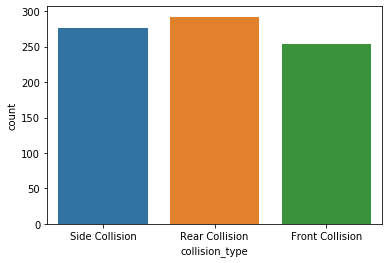

In [14]:
sns.countplot(df.collision_type)

In [15]:
df.collision_type.mode() #most frequently occuring value.

0    Rear Collision
dtype: object

In [16]:
df.collision_type.isnull().sum()/1000*100

17.8

17.8% of data in collision_type is null.



In [17]:
(df['collision_type'] == 'Rear Collision').sum()/df.collision_type.count()*100 #checking the % share of most frequently occuring value.

35.523114355231144

35.52% of data in collision_type is 'Rear Collision'



In [18]:
from sklearn.impute import SimpleImputer

In [19]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [20]:
si = si.fit(df[['collision_type']])

In [21]:
df[['collision_type']] = si.transform(df[['collision_type']])

In [22]:
df[['collision_type']].isnull().sum()

collision_type    0
dtype: int64

In [23]:
df.property_damage.unique()

array(['YES', nan, 'NO'], dtype=object)

There are 2 unique categories in property_damage



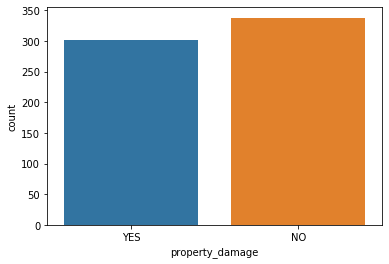

In [24]:
sns.countplot(df.property_damage)

In [25]:
df.property_damage.mode() #most frequently occuring value.

0    NO
dtype: object

In [26]:
df.property_damage.isnull().sum()/1000*100

36.0

36.0% of data in collision_type is null.



In [27]:
(df['property_damage'] == 'NO').sum()/df.property_damage.count()*100 #checking the % share of most frequently occuring value.

52.81249999999999

52.81% of data in collision_type is 'No'



In [28]:
from sklearn.impute import SimpleImputer

In [29]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [30]:
si = si.fit(df[['property_damage']])

In [31]:
df[['property_damage']] = si.transform(df[['property_damage']])

In [32]:
df[['property_damage']].isnull().sum()

property_damage    0
dtype: int64

In [33]:
df.police_report_available.unique()

array(['YES', nan, 'NO'], dtype=object)

There are 2 unique categories in police_report_available



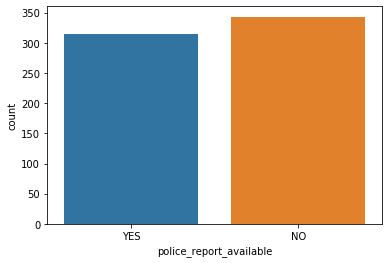

In [34]:
sns.countplot(df.police_report_available)

In [35]:
df.police_report_available.mode() #most frequently occuring value.

0    NO
dtype: object

In [36]:
df.police_report_available.isnull().sum()/1000*100

34.300000000000004

In [37]:
(df['police_report_available'] == 'NO').sum()/df.police_report_available.count()*100 #checking the % share of most frequently occuring value.

52.207001522070016

52.20% of data in collision_type is 'No'



In [38]:
from sklearn.impute import SimpleImputer

In [39]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [40]:
si = si.fit(df[['police_report_available']])

In [41]:
df[['police_report_available']] = si.transform(df[['police_report_available']])

In [42]:
df[['police_report_available']].isnull().sum()

police_report_available    0
dtype: int64

In [43]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

There are no more null values in the dataset.



In [44]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


Feature column data type indicates that feature data are a mix of continuous and categorical data ,while target / label ('fraud_reported') data type indicates that dependent variable data is categorical in nature.

In [45]:
df.nunique() #analysing unique values in each column

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [46]:
df.dtypes[df.dtypes == 'object'] #Identifying the Categorical Columns

policy_bind_date           object
policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_date              object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
incident_location          object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
fraud_reported             object
dtype: object

In [47]:
df.dtypes[df.dtypes != 'object'] #Identifying the Continuous/Discrete Columns

months_as_customer               int64
age                              int64
policy_number                    int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_year                        int64
dtype: object

In [48]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


Difference in mean and 50% and considerable difference in 75% and max of columns months_as_customer,policy_annual_premium,capital-gains,total_claim_amount,injury_claim and property_claim suggests skewness in respective data distributions and presence of outliers.



# Analyzing the Target Class

In [49]:
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

There are 2 unique catergorical values in the Label column / target variable.

In [50]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

Class
'N' : Has 753 values

'Y' : Has 247 values

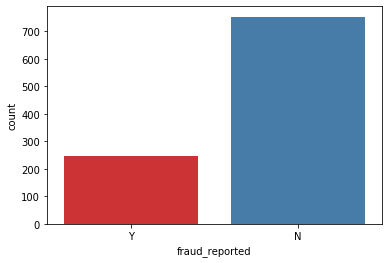

In [51]:
sns.countplot(df['fraud_reported'], palette="Set1")

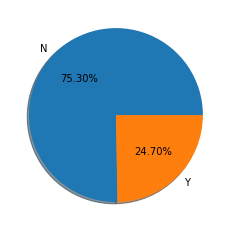

In [52]:
labels = 'N','Y'
fig, ax = plt.subplots()
ax.pie(df['fraud_reported'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

Class
'N' : Has 75.30% of total values

'Y' : Has 24.70% of total values

# Classes are imbalanced.

# Analyzing Feature columns Catergorical Classes

In [53]:
df.dtypes[df.dtypes == 'object'] #Identifying the Categorical Columns

policy_bind_date           object
policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_date              object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
incident_location          object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
fraud_reported             object
dtype: object

In [54]:
df['policy_bind_date'].unique()

array(['17-10-2014', '27-06-2006', '06-09-2000', '25-05-1990',
       '06-06-2014', '12-10-2006', '04-06-2000', '03-02-1990',
       '05-02-1997', '25-07-2011', '26-05-2002', '29-05-1999',
       '20-11-1997', '26-10-2012', '28-12-1998', '19-10-1992',
       '08-06-2005', '15-11-2004', '28-12-2014', '02-08-1992',
       '25-06-2002', '27-11-2005', '27-05-1994', '08-02-1991',
       '02-02-1996', '05-12-2013', '20-09-1990', '18-07-2002',
       '08-02-1990', '04-03-2014', '18-02-2000', '19-06-2008',
       '01-08-2003', '04-04-1992', '13-01-1991', '08-08-2010',
       '09-03-2003', '03-02-1993', '25-11-2002', '27-07-1997',
       '08-05-1995', '30-08-2012', '30-04-2006', '13-04-2003',
       '05-12-2007', '21-08-2006', '08-01-1990', '18-03-1990',
       '07-01-2008', '10-03-1997', '10-01-2004', '20-08-1994',
       '02-06-2002', '28-04-1994', '17-08-2014', '11-08-2007',
       '20-11-2008', '18-10-1995', '19-05-1993', '26-02-2005',
       '14-02-1990', '30-09-1993', '10-06-2014', '28-10

In [55]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date']) #creating datetime type dataframe

In [56]:
df['Bind_Year']=df['policy_bind_date'].apply(lambda y:y.year) #mapping year values to 'Year' column in main dataframe

In [57]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Bind_Year
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,2014
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NO,5070,780,780,3510,Mercedes,E400,2007,Y,2006
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,2000
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1990
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,2014


Dropping the column 'policy_bind_date' since it is no longer needed.



In [58]:
df.drop(columns = ['policy_bind_date'],inplace = True)

In [59]:
df.Bind_Year.max() # finding the most recent bind year

2015

In [60]:
df['Bind_Age'] = df['Bind_Year'].apply(lambda y: 2016 - y)

In [61]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Bind_Year,Bind_Age
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,71610,6510,13020,52080,Saab,92x,2004,Y,2014,2
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,5070,780,780,3510,Mercedes,E400,2007,Y,2006,10
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,34650,7700,3850,23100,Dodge,RAM,2007,N,2000,16
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1990,26
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,6500,1300,650,4550,Accura,RSX,2009,N,2014,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,87200,17440,8720,61040,Honda,Accord,2006,N,1991,25
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,108480,18080,18080,72320,Volkswagen,Passat,2015,N,2014,2
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,67500,7500,7500,52500,Suburu,Impreza,1996,N,2003,13
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,46980,5220,5220,36540,Audi,A5,1998,N,2011,5


Dropping the column 'policy_bind_date' since it is no longer needed.



In [62]:
df.drop(columns = ['Bind_Year'],inplace = True)

In [63]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Bind_Age
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,2
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NO,5070,780,780,3510,Mercedes,E400,2007,Y,10
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,16
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,26
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,NO,87200,17440,8720,61040,Honda,Accord,2006,N,25
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N,2
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,13
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,5


In [64]:
df['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

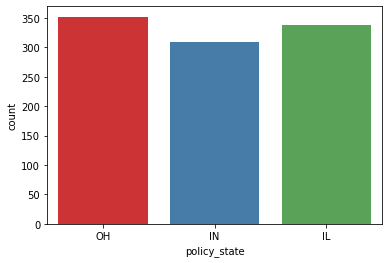

In [65]:
sns.countplot(df['policy_state'], palette="Set1")

There are 3 unique categories and majority of the reports are from 'OH' state.



In [66]:
df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

There are 3 unique categories in policy_csl



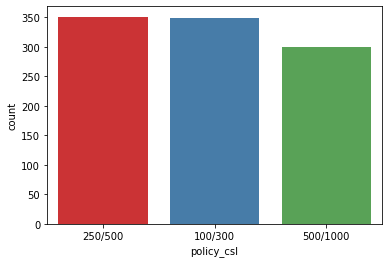

In [67]:
sns.countplot(df['policy_csl'], palette="Set1")

Majority of combined single limits are 250/100 and 100/300.



In [68]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

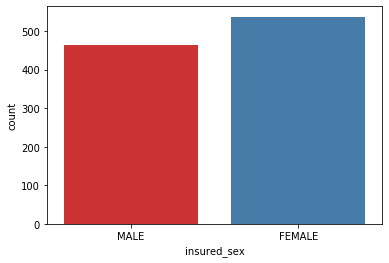

In [69]:
sns.countplot(df['insured_sex'], palette="Set1")

Male and Female reports are almost balanced.



In [70]:
df['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

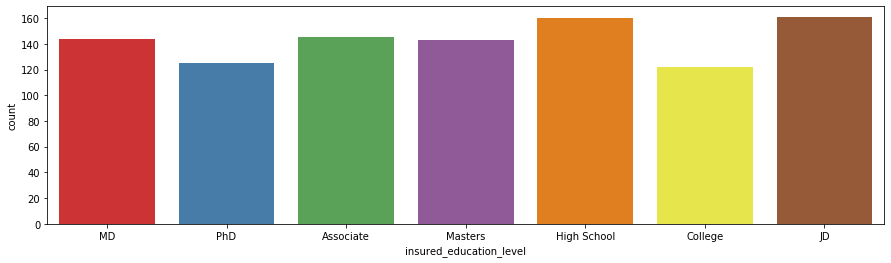

In [71]:
plt.figure(figsize=(15,4),facecolor='white')
sns.countplot(df['insured_education_level'], palette="Set1")

High School, JD and MD are the most common insured_education_level





Husband is the most common relationship.

In [72]:
df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

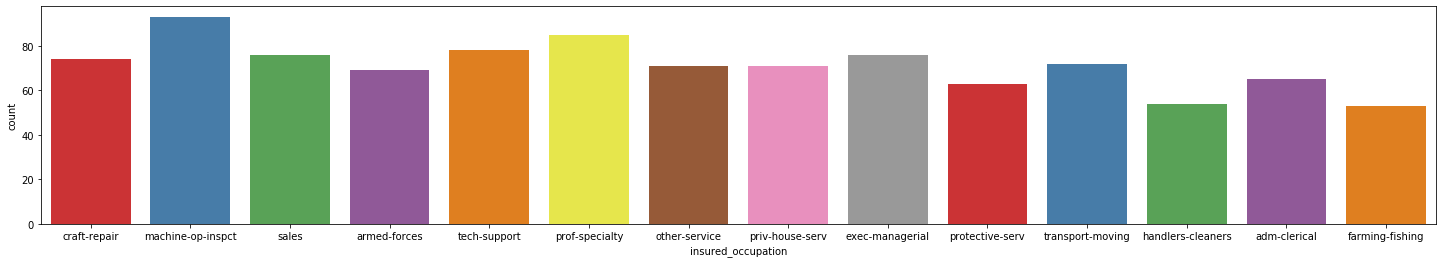

In [73]:
plt.figure(figsize=(25,4),facecolor='white')
sns.countplot(df['insured_occupation'], palette="Set1")

machine-op-inspct and prof-specialty are the most common occupations.



In [74]:
df['insured_hobbies'].value_counts()

reading           64
paintball         57
exercise          57
bungie-jumping    56
movies            55
camping           55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

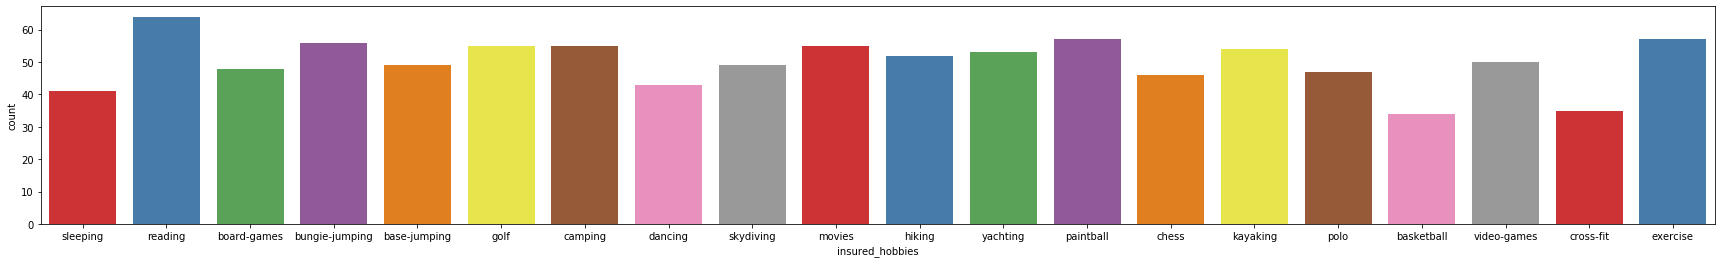

In [75]:
plt.figure(figsize=(30,4),facecolor='white')
sns.countplot(df['insured_hobbies'], palette="Set1")

reading,exercise and paintball are most common hobbies.



In [76]:
df['incident_date'].value_counts()

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
24-01-2015    24
04-02-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
22-02-2015    20
06-02-2015    20
12-02-2015    20
31-01-2015    20
12-01-2015    19
01-01-2015    19
14-01-2015    19
21-01-2015    19
23-02-2015    19
21-02-2015    19
03-01-2015    18
14-02-2015    18
18-01-2015    18
01-02-2015    18
28-02-2015    18
20-01-2015    18
25-02-2015    18
06-01-2015    17
26-02-2015    17
08-02-2015    17
09-01-2015    17
24-02-2015    17
16-02-2015    16
13-02-2015    16
15-02-2015    16
16-01-2015    16
05-02-2015    16
18-02-2015    15
17-01-2015    15
15-01-2015    15
28-01-2015    15
27-02-2015    14
20-02-2015    14
22-01-2015    14
09-02-2015    13
23-01-2015    13
27-01-2015    13
03-02-2015    13
01-03-2015    12
04-01-2015    12
02-01-2015    11
26-01-2015    11
29-01-2015    11
19-02-2015    10
11-02-2015    10
25-01-2015    10
07-02-2015    10
10-02-2015    10
11-01-2015    

Extracting Incident Month from incident_date



In [77]:
df['incident_date']=pd.to_datetime(df['incident_date']) #creating datetime type dataframe

In [78]:
df['incident_month']=df['incident_date'].apply(lambda m:m.month) #mapping month values to 'incident_month' column in main dataframe

In [79]:
df.drop(columns=['incident_date'],inplace=True) # dropping auto_year since it is no longer needed

In [80]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Bind_Age,incident_month
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,71610,6510,13020,52080,Saab,92x,2004,Y,2,1
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,5070,780,780,3510,Mercedes,E400,2007,Y,10,1
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,34650,7700,3850,23100,Dodge,RAM,2007,N,16,2
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,26,10
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,6500,1300,650,4550,Accura,RSX,2009,N,2,2


In [81]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

There are 4 unique categories.



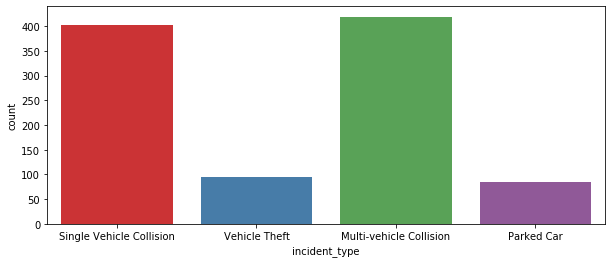

In [82]:
plt.figure(figsize=(10,4),facecolor='white')
sns.countplot(df['incident_type'], palette="Set1")

Majority of the cases are Multi-vehicle Collision and Single Vehicle Collision.



In [83]:
df['collision_type'].unique()

array(['Side Collision', 'Rear Collision', 'Front Collision'],
      dtype=object)

There are 3 unique categories in collision_type



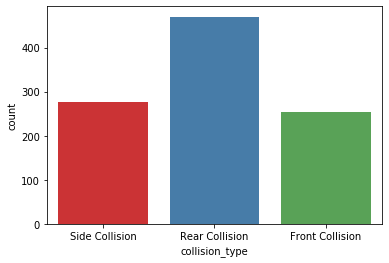

In [84]:
sns.countplot(df['collision_type'], palette="Set1")

Majority of cases are Rear Collision.



In [85]:
df['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

There are 4 unique categories in incident_severity



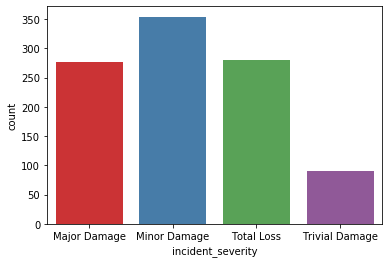

In [86]:
sns.countplot(df['incident_severity'], palette="Set1")

Minor Damage is most common followed bu Major Damage and Total loss.



In [87]:
df['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

There are 5 unique Categories



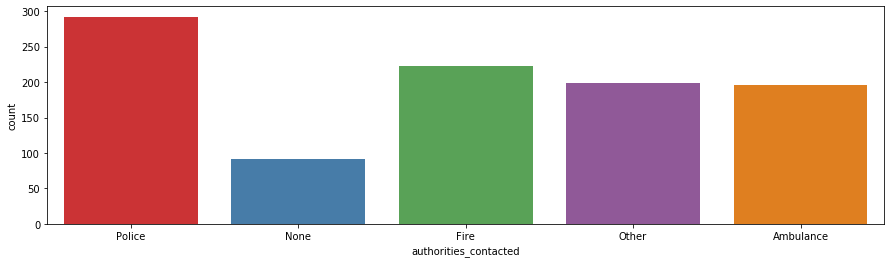

In [88]:
plt.figure(figsize=(15,4),facecolor='white')
sns.countplot(df['authorities_contacted'], palette="Set1")

Most common aurthorities contacted were the Ploice followed by Fire force.



In [89]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

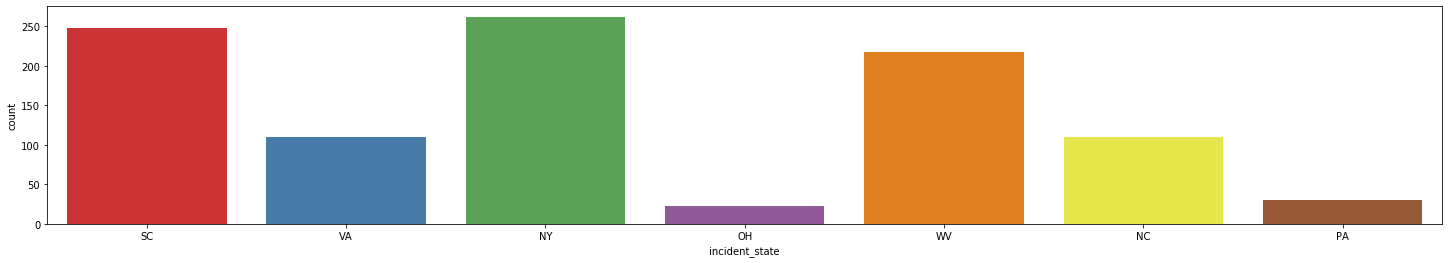

In [90]:
plt.figure(figsize=(25,4),facecolor='white')
sns.countplot(df['incident_state'], palette="Set1")

Most of the incidents occured in SC,NY and WV



In [91]:
df['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

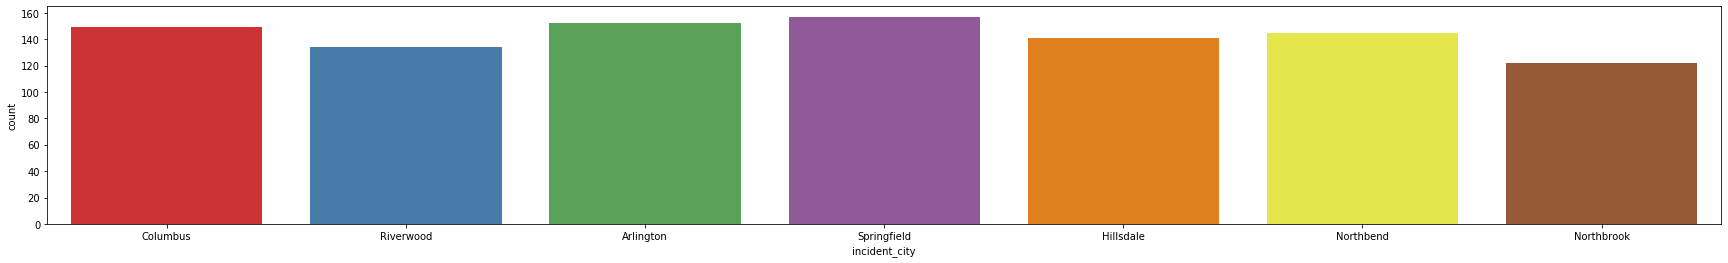

In [92]:
plt.figure(figsize=(30,4),facecolor='white')
sns.countplot(df['incident_city'], palette="Set1")

Most incidents were reported from Columbus,Arlington, Springfield



In [93]:
df['incident_location'].value_counts()

3706 4th Hwy          1
2352 Sky Drive        1
5532 Weaver Ridge     1
9101 2nd Hwy          1
1679 2nd Hwy          1
                     ..
3052 Weaver Ridge     1
8655 Cherokee Lane    1
7877 Sky Lane         1
5201 Texas Hwy        1
4538 Flute Hwy        1
Name: incident_location, Length: 1000, dtype: int64

In [94]:
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

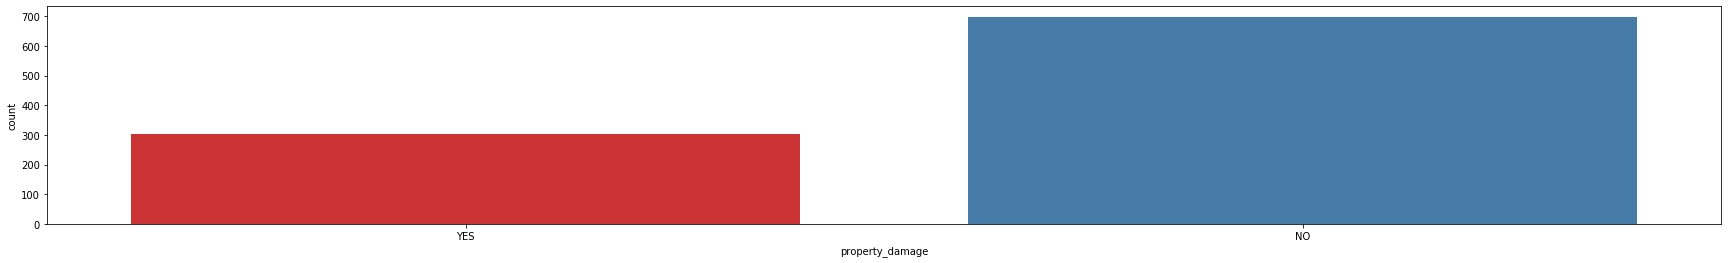

In [95]:
plt.figure(figsize=(30,4),facecolor='white')
sns.countplot(df['property_damage'], palette="Set1")

Majority reported no property damage.



In [96]:
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

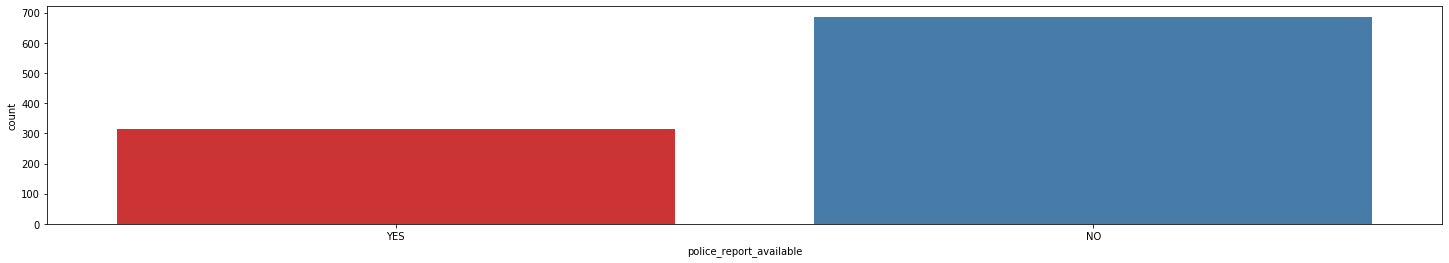

In [97]:
plt.figure(figsize=(25,4),facecolor='white')
sns.countplot(df['police_report_available'], palette="Set1")

There are no police reports available for most cases.



In [98]:
df['auto_make'].value_counts()

Dodge         80
Saab          80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

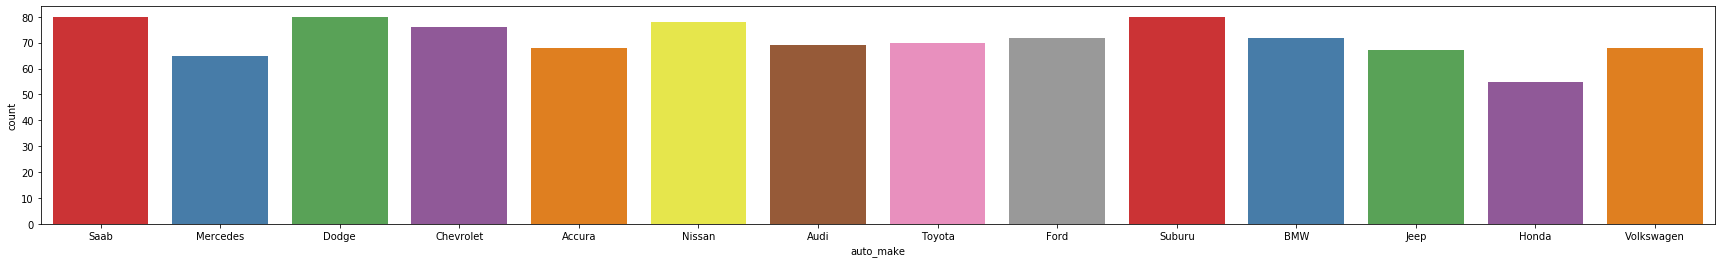

In [99]:
plt.figure(figsize=(30,4),facecolor='white')
sns.countplot(df['auto_make'], palette="Set1")

Reports are fairly evenly distributed amongst all the classes.



In [100]:
df['auto_model'].value_counts()

RAM               43
Wrangler          42
Neon              37
A3                37
MDX               36
Jetta             35
Passat            33
Legacy            32
A5                32
Pathfinder        31
Malibu            30
Camry             28
Forrestor         28
92x               28
E400              27
F150              27
95                27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Civic             22
Silverado         22
Highlander        22
Fusion            21
Corolla           20
CRV               20
TL                20
ML350             20
Impreza           20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

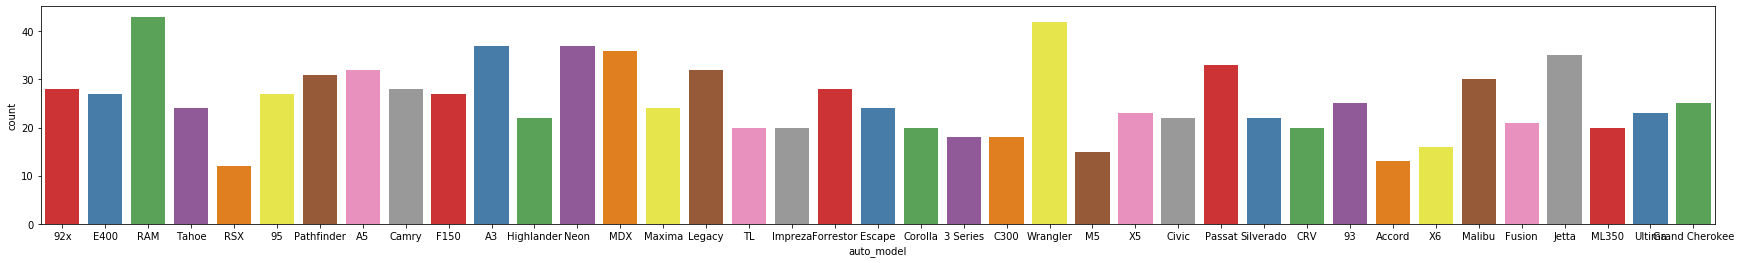

In [101]:
plt.figure(figsize=(30,4),facecolor='white')
sns.countplot(df['auto_model'], palette="Set1")

most reports belong to models RAM,A3,Wrangler,Neon



In [102]:
df.dtypes[df.dtypes != 'object'] #Identifying the Continuous/Discrete Columns

months_as_customer               int64
age                              int64
policy_number                    int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_year                        int64
Bind_Age                         int64
incident_month                   int64
dtype: object

Extracting Age from auto_year



In [103]:
df['auto_age'] = df['auto_year'].apply(lambda y: 2016 - y)

In [104]:
df.drop(columns=['auto_year'],inplace=True) # dropping auto_year since it is no longer needed

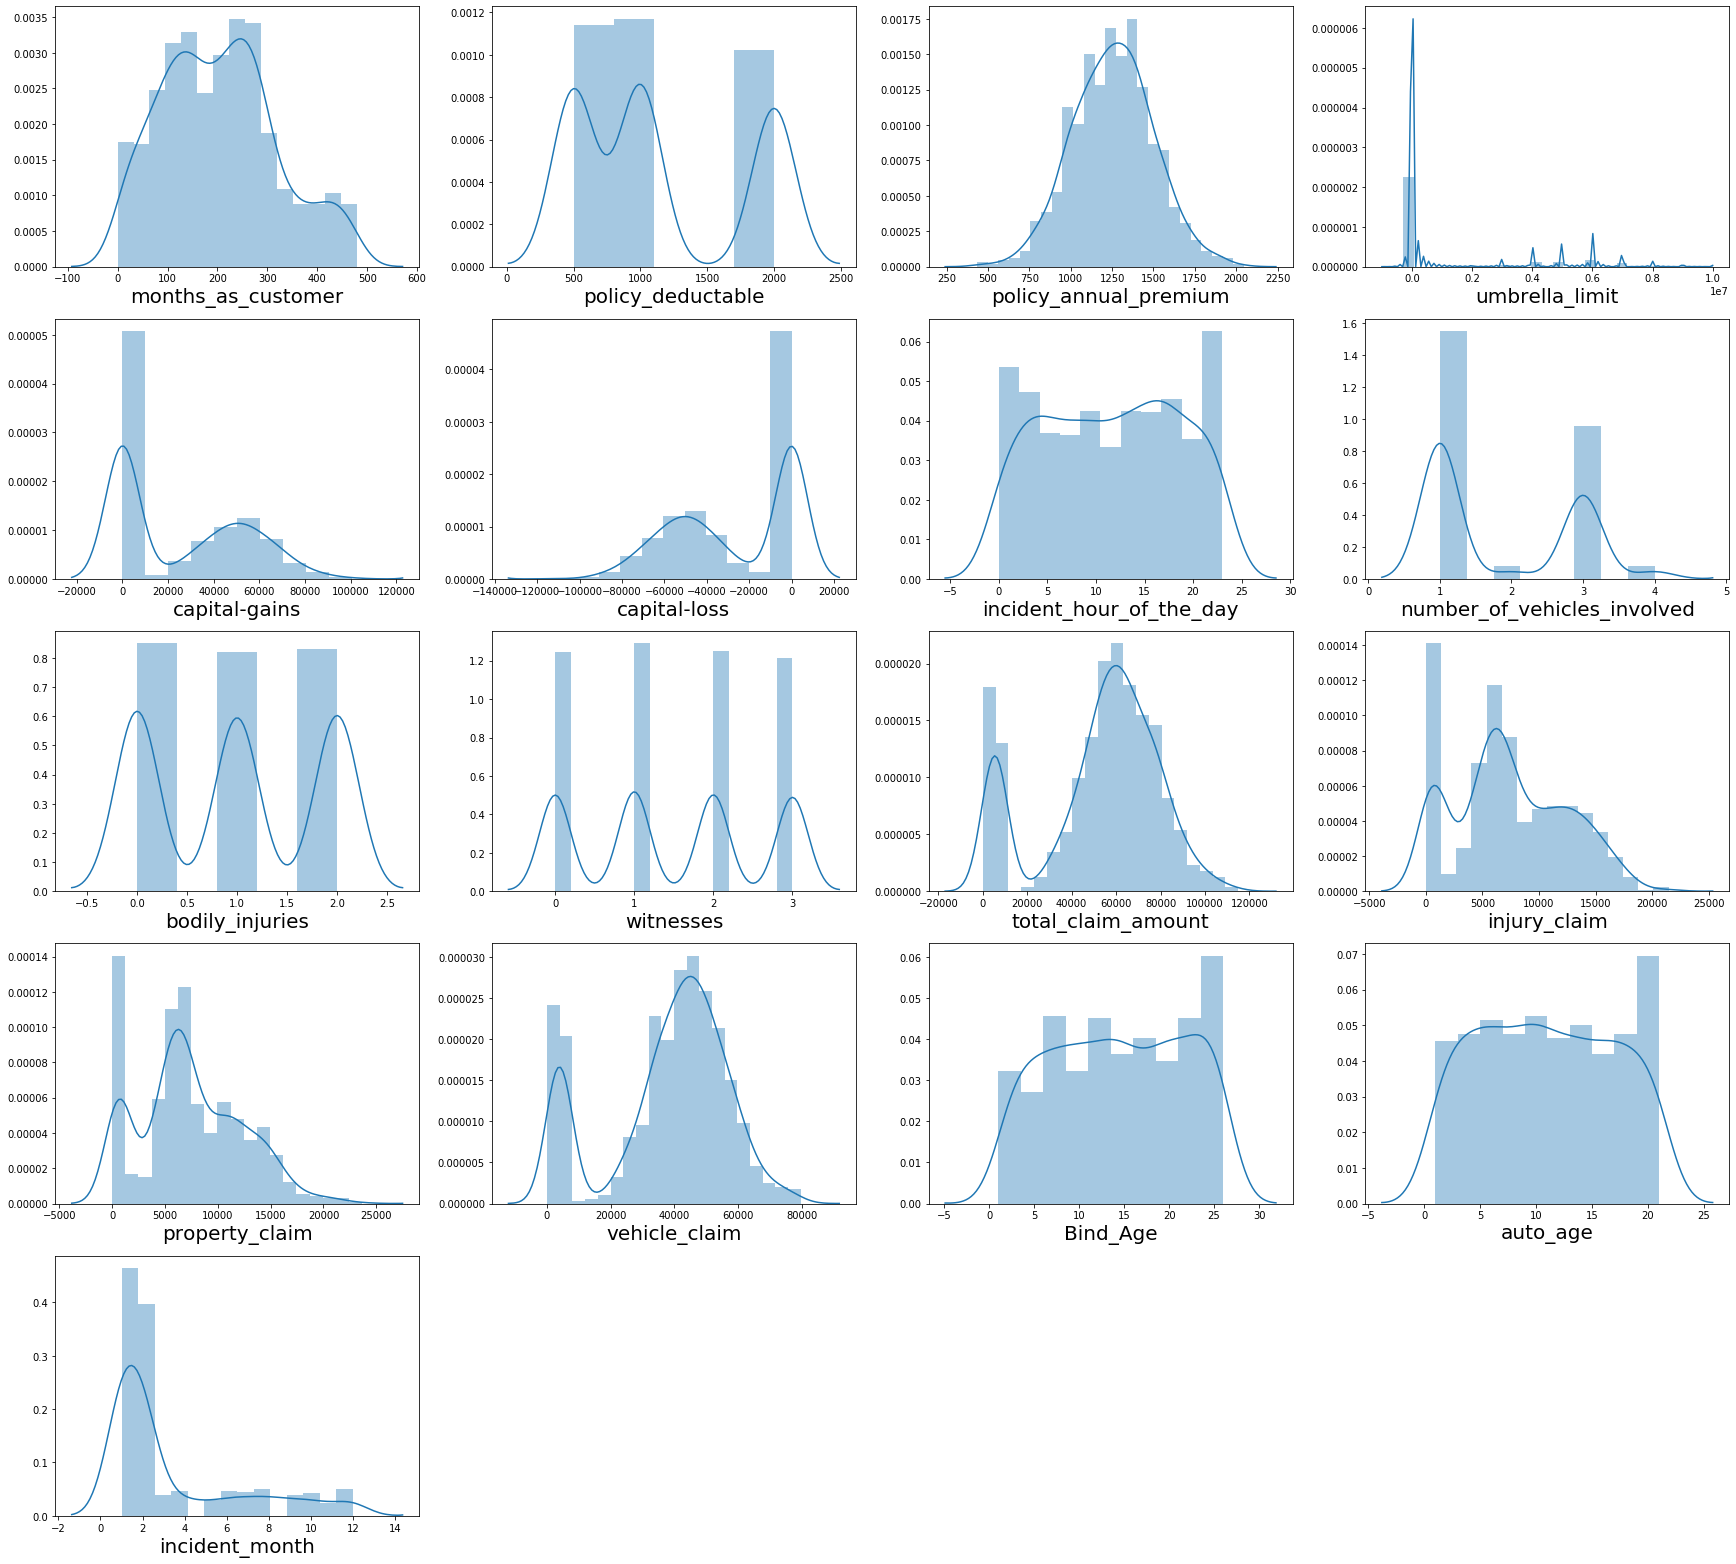

In [105]:
plt.figure(figsize=(30,45),facecolor='white')
plotnum=1
for col in df[['months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','Bind_Age','auto_age','incident_month']]:
    if plotnum<=30:
        plt.subplot(8,4,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Most continuous distributions are normally distributed and are multimodal.



In [106]:
df.incident_month.value_counts()

1     365
2     312
12     39
8      39
6      37
4      36
7      35
10     34
3      31
9      30
5      23
11     19
Name: incident_month, dtype: int64

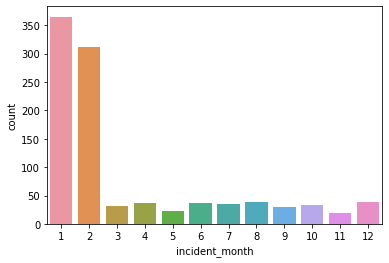

In [107]:
sns.countplot(df.incident_month)

Most incidents take place between January and February



In [108]:
df[['months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','Bind_Age','auto_age']].skew()

months_as_customer             0.362177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
Bind_Age                      -0.052511
auto_age                       0.048289
dtype: float64

vehicle_claim,total_claim_amount are skewed..



Dropping unecessary columns

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_type                  1000 non-null object
collision_type   

In [110]:
df.drop(columns=['policy_number','insured_zip','incident_location'],inplace=True)

In [111]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,Bind_Age,incident_month,auto_age
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,71610,6510,13020,52080,Saab,92x,Y,2,1,12
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,5070,780,780,3510,Mercedes,E400,Y,10,1,9
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,34650,7700,3850,23100,Dodge,RAM,N,16,2,9
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,63400,6340,6340,50720,Chevrolet,Tahoe,Y,26,10,2
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,6500,1300,650,4550,Accura,RSX,N,2,2,7


# Interpreting Relationship between Dependent Variable and Independent Variables

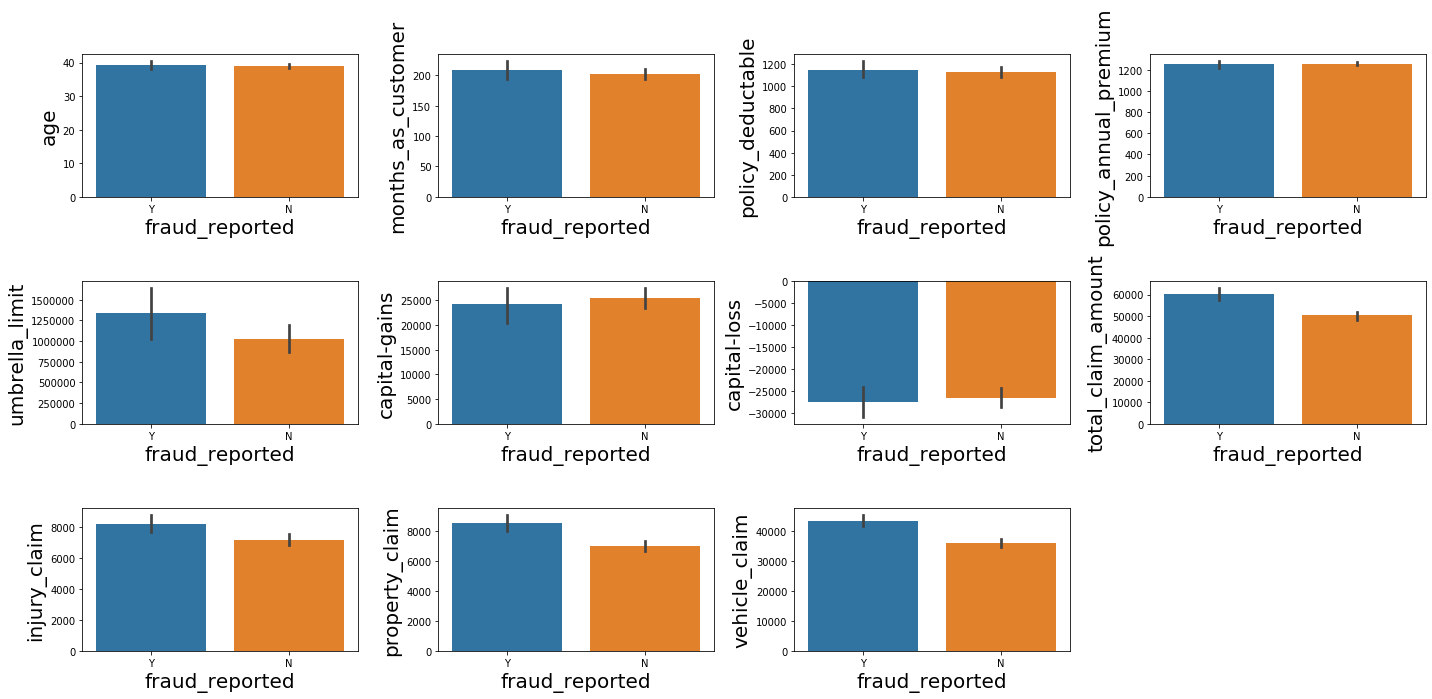

In [112]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = df['fraud_reported']
X = df[['age','months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','total_claim_amount','injury_claim','property_claim','vehicle_claim']]
for col in X:
    if plotnum<=30:
        plt.subplot(8,4,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('fraud_reported',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

'Income' vs Categorical Data Columns

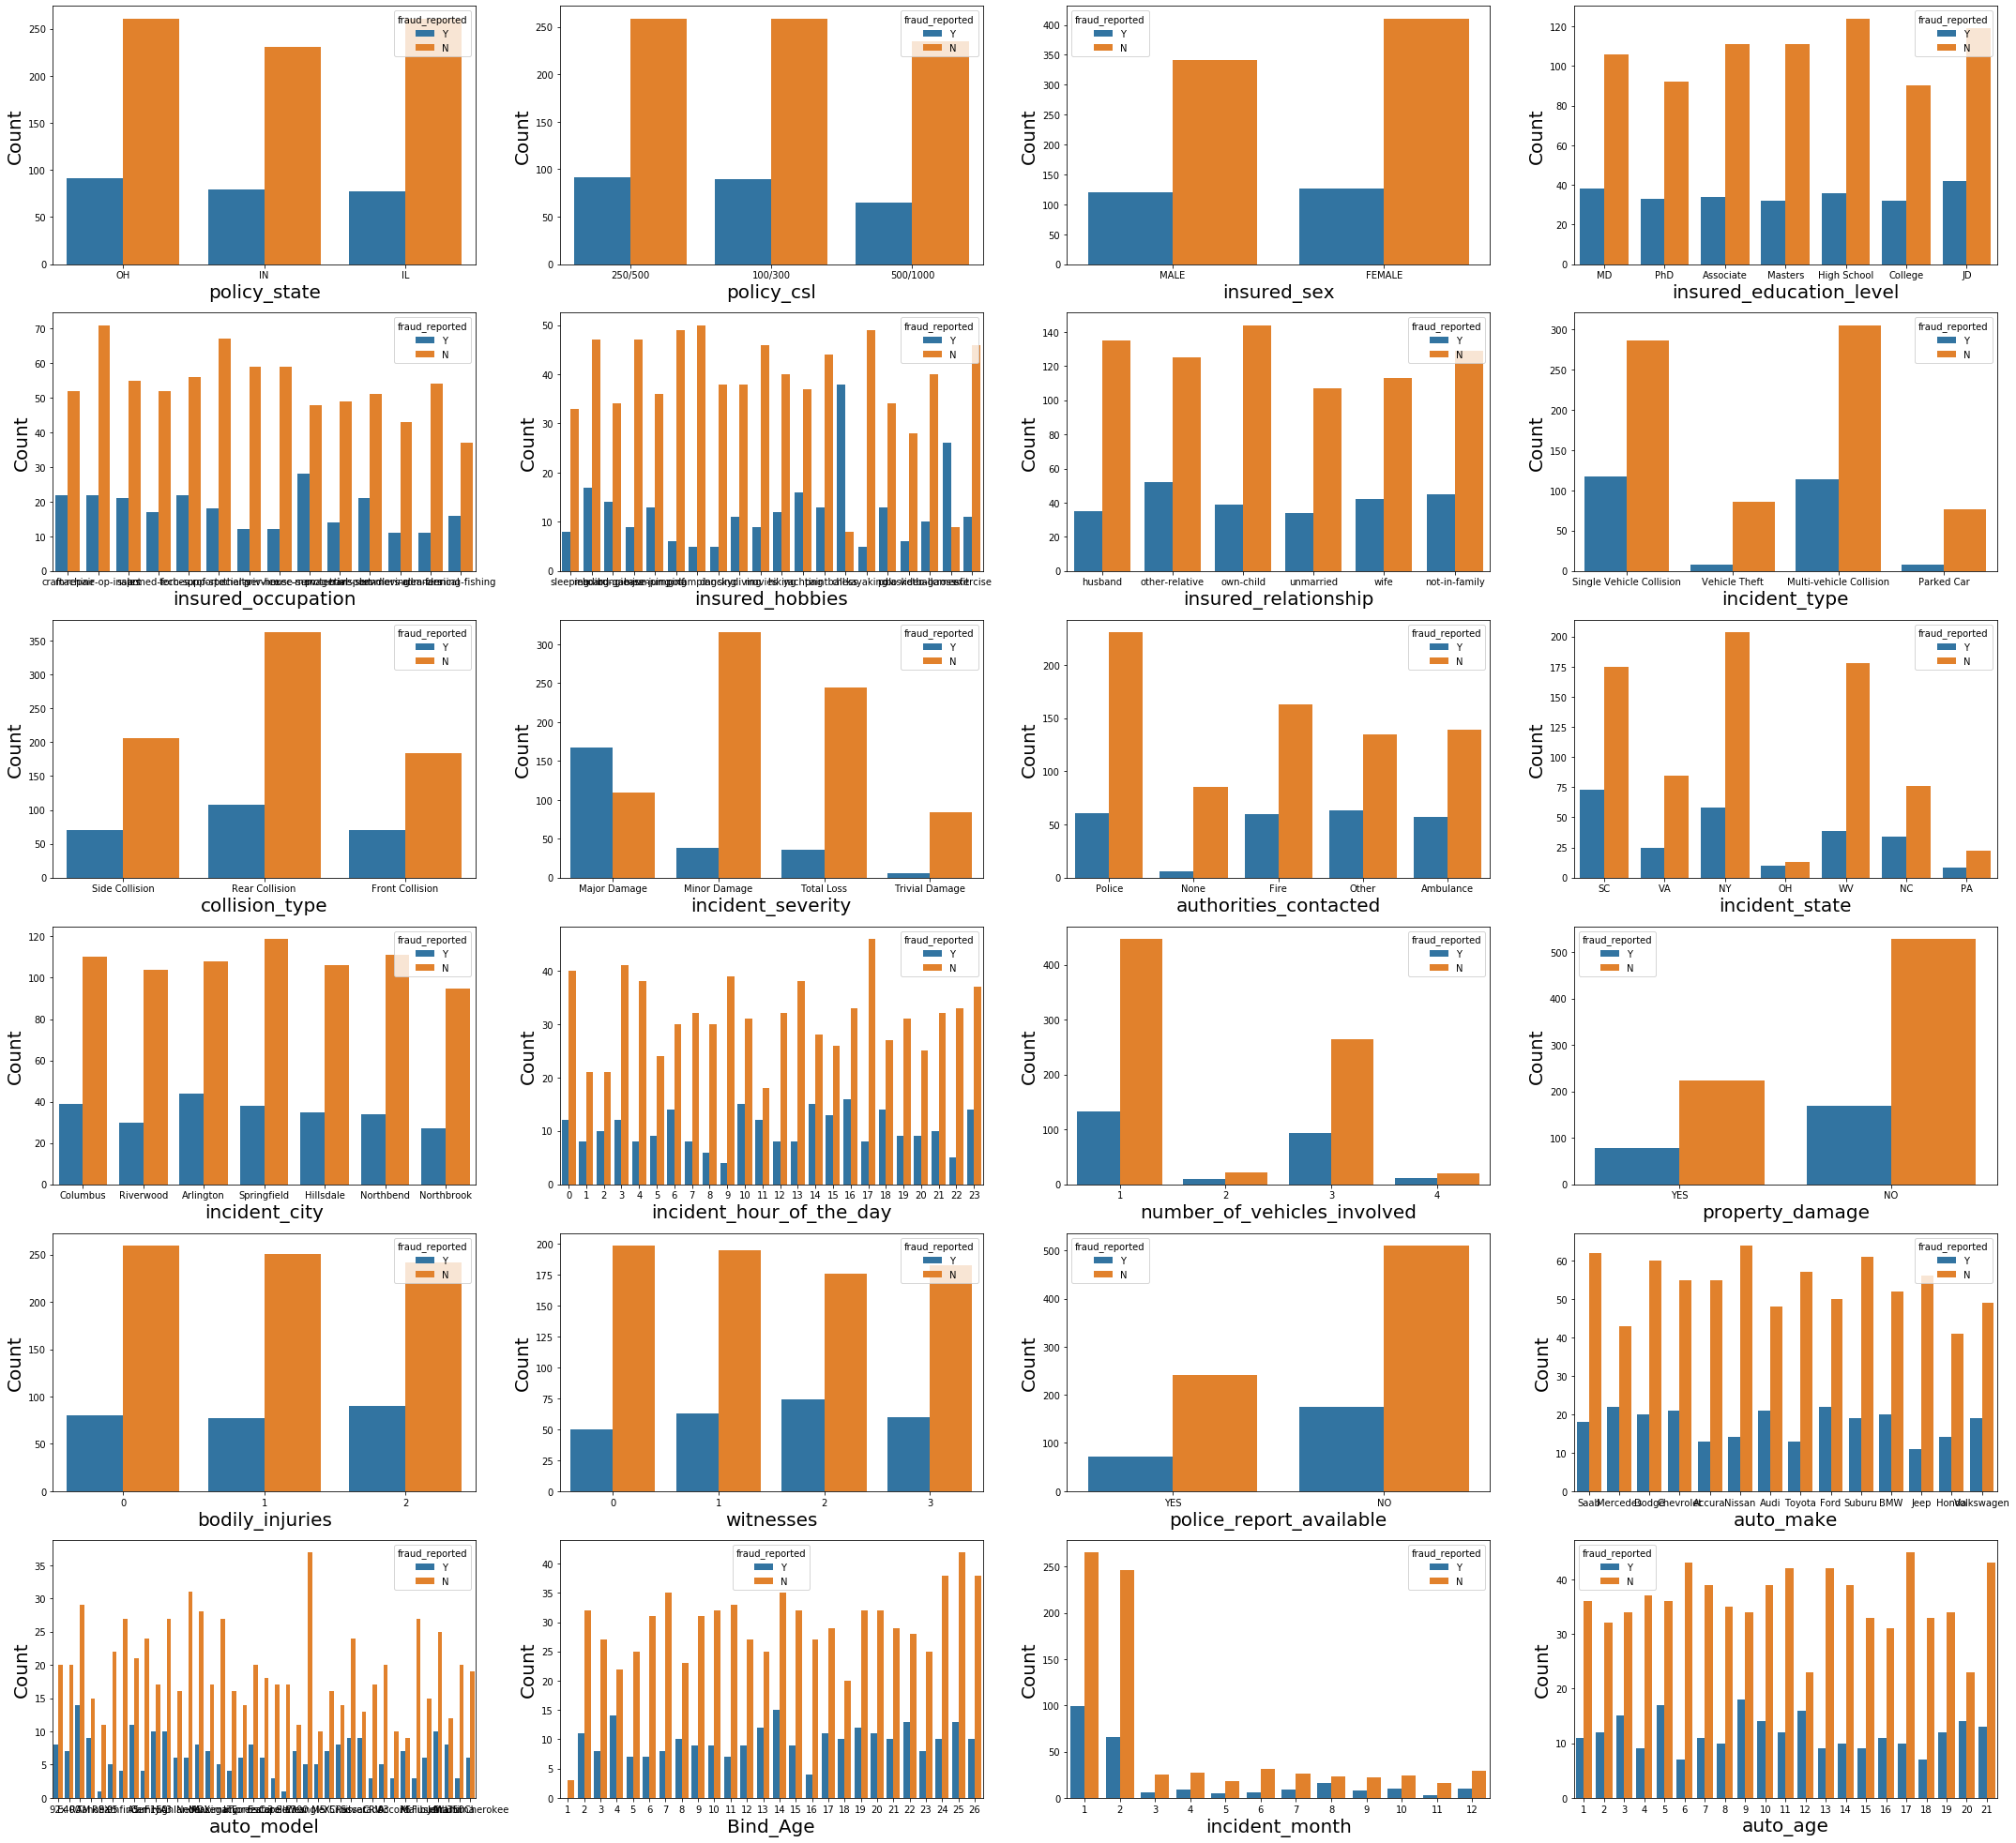

In [113]:
plt.figure(figsize=(30,45),facecolor='white')
plotnum=1
y = df['fraud_reported']
X = df.drop(columns=['fraud_reported','age','months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','total_claim_amount','injury_claim','property_claim','vehicle_claim'])
for col in X:
    if plotnum<=40:
        plt.subplot(10,4,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

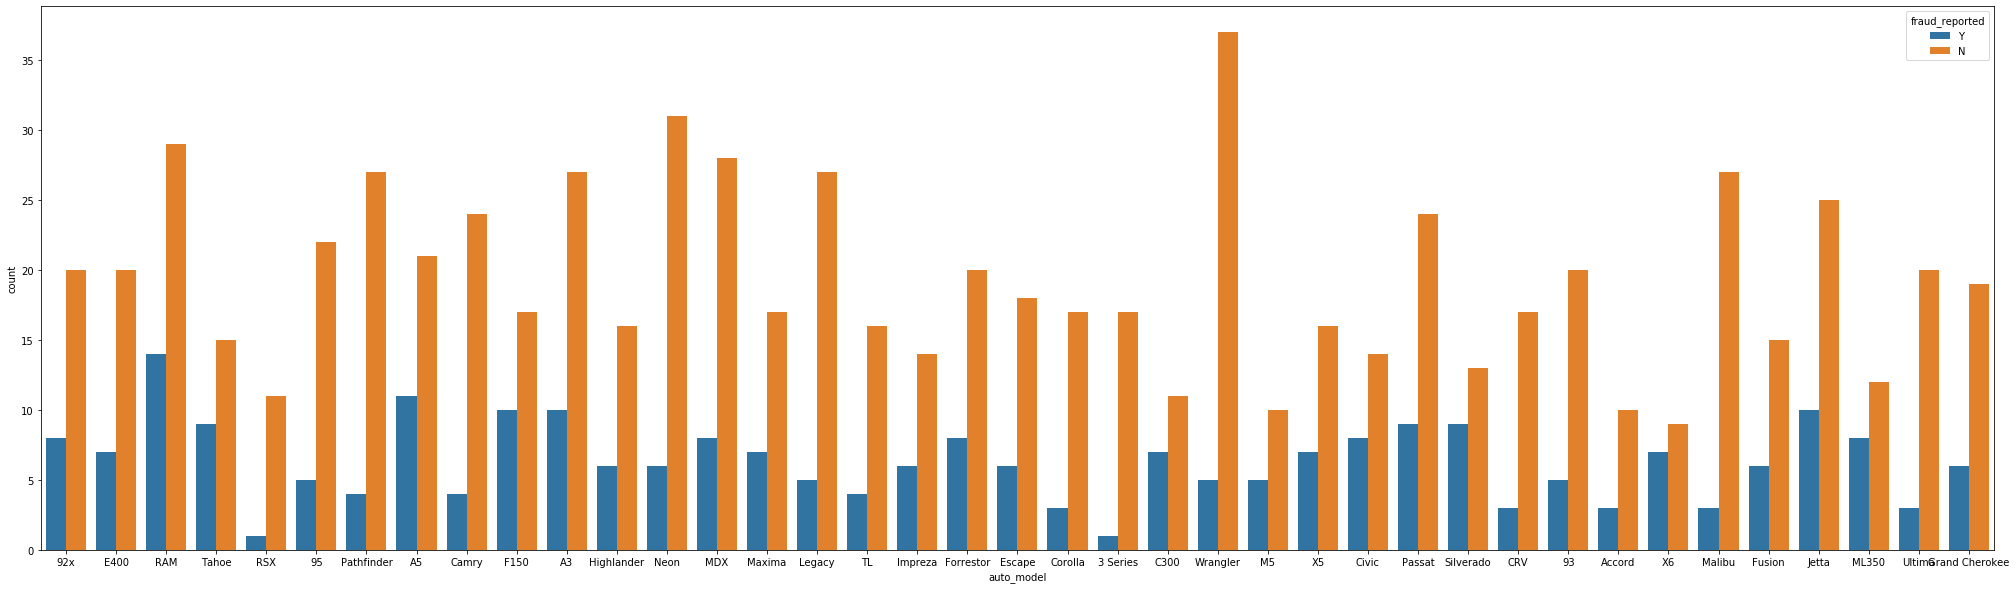

In [114]:
plt.figure(figsize=(35,10),facecolor='white')
sns.countplot(df.auto_model,hue =df.fraud_reported)

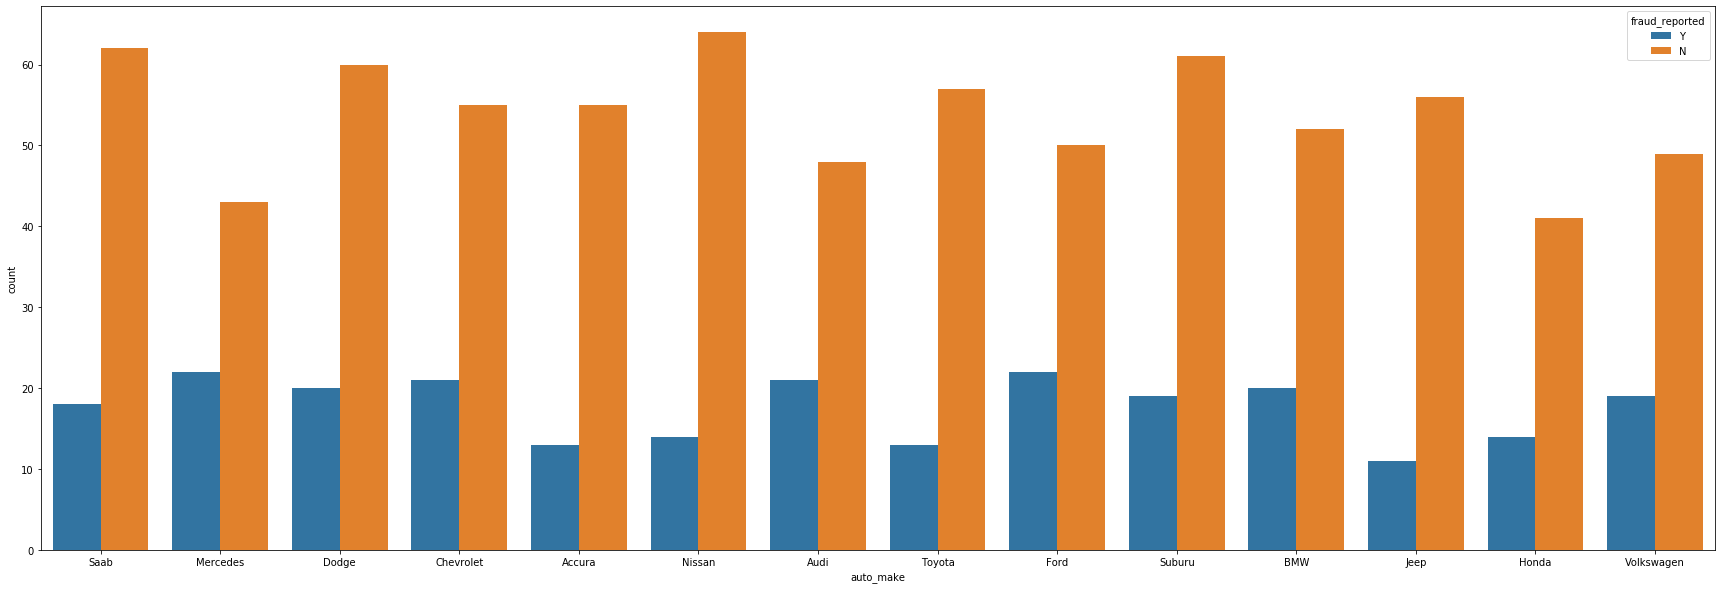

In [115]:
plt.figure(figsize=(30,10),facecolor='white')
sns.countplot(df.auto_make,hue =df.fraud_reported)

Mercedes,Dodge,Chevrolet,Audi,FOrd,Volkswagen have the highest fraud insurance claims



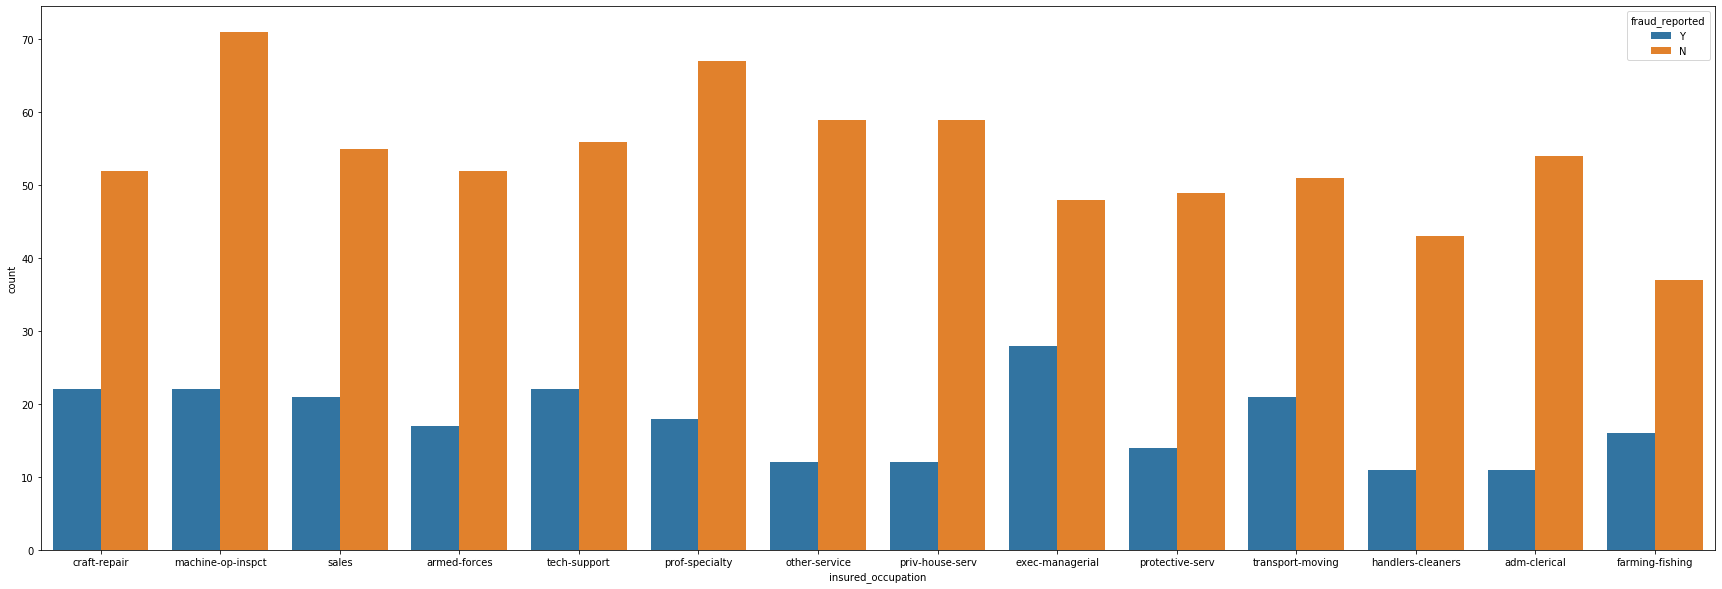

In [116]:
plt.figure(figsize=(30,10),facecolor='white')
sns.countplot(df.insured_occupation,hue =df.fraud_reported)

Most fraud reports were filed by exec manegerial,Transport moving and Craft repair



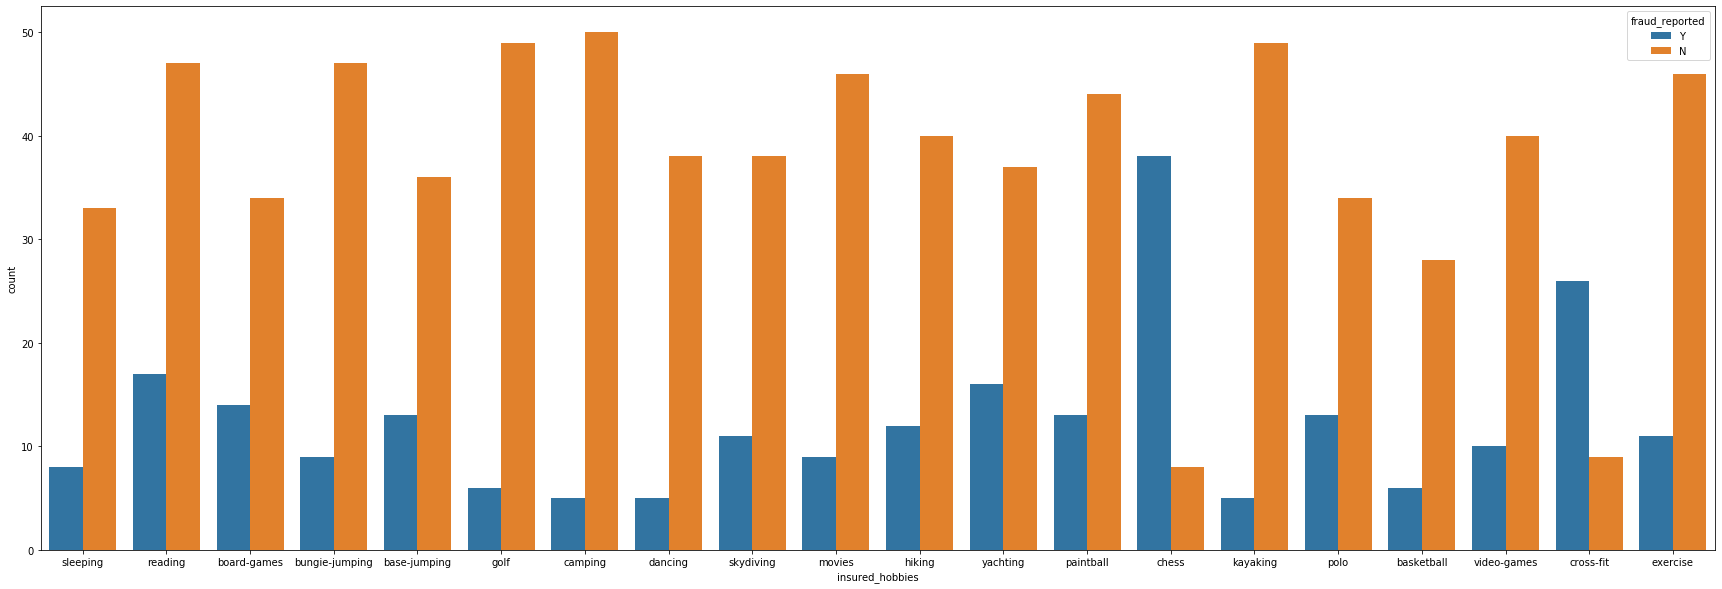

In [117]:
plt.figure(figsize=(30,10),facecolor='white')
sns.countplot(df.insured_hobbies,hue =df.fraud_reported)

most fraud claimants have chess and cross fit as hobbies



In [118]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
Bind_Age                      -0.052511
incident_month                 1.375894
auto_age                       0.048289
dtype: float64

# Checking for Outliers in columns with continuous distribution

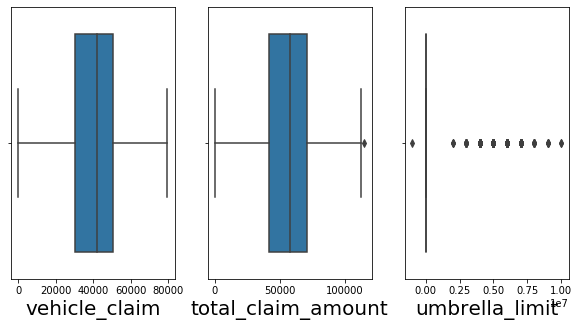

In [119]:
plt.figure(figsize=(10,5),facecolor='white')
plotnum=1
for col in df[['vehicle_claim','total_claim_amount','umbrella_limit']]:
    if plotnum<=3:
        plt.subplot(1,3,plotnum)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

There arent considerable outliers in the columns.



# Checking for Skewness in Data

In [120]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
Bind_Age                      -0.052511
incident_month                 1.375894
auto_age                       0.048289
dtype: float64

vehicle_claim,total_claim_amount are skewed.



# Reducing skewness using PowerTransformer


In [121]:
from sklearn.preprocessing import PowerTransformer

In [122]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [123]:
df4 = df[['vehicle_claim','total_claim_amount']]

In [124]:
transformed= powtrans.fit_transform(df4)

In [125]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe

In [126]:
transformed.skew()

vehicle_claim        -0.522718
total_claim_amount   -0.510354
dtype: float64

In [127]:
transformed.index = df.index

In [128]:
df[['vehicle_claim','total_claim_amount']]=transformed[['vehicle_claim','total_claim_amount']]

In [129]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,Bind_Age,incident_month,auto_age
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,0.715714,6510,13020,0.753697,Saab,92x,Y,2,1,12
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,-1.776979,780,780,-1.786629,Mercedes,E400,Y,10,1,9
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,-0.716825,7700,3850,-0.820881,Dodge,RAM,N,16,2,9
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,0.391426,6340,6340,0.677602,Chevrolet,Tahoe,Y,26,10,2
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,-1.729802,1300,650,-1.740038,Accura,RSX,N,2,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,...,1.338829,17440,8720,1.259186,Honda,Accord,N,25,2,10
996,285,41,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,...,2.202447,18080,18080,1.904757,Volkswagen,Passat,N,2,1,1
997,130,34,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,...,0.553012,7500,7500,0.777232,Suburu,Impreza,N,13,1,20
998,458,62,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,...,-0.247520,5220,5220,-0.104258,Audi,A5,N,5,2,18


# Encoding the categorical Feature Columns.

In [130]:
df.dtypes[df.dtypes == 'object'] #Identifying the Categorical Columns

policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
fraud_reported             object
dtype: object

In [131]:
df.nunique()

months_as_customer             391
age                             46
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_type                    4
collision_type                   3
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  2
bodily_injuries                  3
witnesses                        4
police_report_available          2
total_claim_amount             763
injury_claim                   638
property_claim      

In [132]:
df['insured_sex'] = df.insured_sex.map({'MALE':1,'FEMALE':2})

In [133]:
df['police_report_available'] = df.property_damage.map({'YES':2,'NO':1})

In [134]:
df['property_damage'] = df.property_damage.map({'YES':2,'NO':1})

Encoding the categorical data using Label Encoding Technique



In [135]:
from sklearn.preprocessing import LabelEncoder

In [136]:
labenc = LabelEncoder()

In [137]:
categ = ['authorities_contacted','incident_severity','collision_type','incident_type','insured_relationship','insured_education_level','policy_csl','policy_state']

In [138]:
for col in categ:
    df[col] = labenc.fit_transform(df[col])

In [139]:
df[['auto_make']]= labenc.fit_transform(df[['auto_make']])

In [140]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,Bind_Age,incident_month,auto_age
0,328,48,2,1,1000,1406.91,0,1,4,craft-repair,...,0.715714,6510,13020,0.753697,10,92x,Y,2,1,12
1,228,42,1,1,2000,1197.22,5000000,1,4,machine-op-inspct,...,-1.776979,780,780,-1.786629,8,E400,Y,10,1,9
2,134,29,2,0,2000,1413.14,5000000,2,6,sales,...,-0.716825,7700,3850,-0.820881,4,RAM,N,16,2,9
3,256,41,0,1,2000,1415.74,6000000,2,6,armed-forces,...,0.391426,6340,6340,0.677602,3,Tahoe,Y,26,10,2
4,228,44,0,2,1000,1583.91,6000000,1,0,sales,...,-1.729802,1300,650,-1.740038,0,RSX,N,2,2,7


# Encoding the Label Column.

In [141]:
df['fraud_reported'] = df.fraud_reported.map({'Y':1,'N':0}) #'Y' = 1 and 'N' = 0

In [142]:
df.dtypes[df.dtypes == 'object'] #Identifying the Categorical Columns

insured_occupation    object
insured_hobbies       object
incident_state        object
incident_city         object
auto_model            object
dtype: object

encoding above columns using get_dummies()



In [143]:
df2 = df[['insured_occupation','insured_hobbies','incident_state','incident_city','auto_model','fraud_reported']].copy()

In [144]:
dumm = pd.get_dummies(df[['insured_occupation','insured_hobbies','incident_state','incident_city','auto_model']],drop_first = False)

In [145]:
dumm.columns

Index(['insured_occupation_adm-clerical', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving', 'insured_hobbies_base-jumping',
       'insured_hobbies_basketball', 'insured_hobbies_board-games',
       'insured_hobbies_bungie-jumping', 'insured_hobbies_camping',
       'insured_hobbies_chess', 'insured_hobbies_cross-fit',
       'insured_hobbies_dancing', 'insured_hobbies_exercise',
       'insured_hobbies_golf', 'insured_hobbies_hiking',
       'insured_hobbies_kayaking', 'insured_hobbies_movies',
  

Creating a dataframe with the most important categories



In [146]:

dumm2 = dumm[['insured_occupation_craft-repair','insured_occupation_machine-op-inspct','insured_occupation_tech-support','incident_state_SC','incident_state_NY','insured_occupation_craft-repair','insured_occupation_transport-moving','insured_occupation_exec-managerial','insured_hobbies_cross-fit','insured_hobbies_chess','auto_model_Legacy','auto_model_TL','auto_model_Corolla','auto_model_Ultima','auto_model_Grand Cherokee','auto_model_Malibu','auto_model_Neon','auto_model_95','auto_model_Wrangler','auto_model_Camry','auto_model_RSX','auto_model_RAM','auto_model_A5','auto_model_Jetta','auto_model_ML350','auto_model_Passat','auto_model_F150','auto_model_A3','auto_model_3 Series']].copy()

In [147]:
df = df.join(dumm2)

In [148]:
df.drop(columns=['insured_occupation','insured_hobbies','incident_state','incident_city','auto_model'],inplace=True)

In [149]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_relationship,...,auto_model_Camry,auto_model_RSX,auto_model_RAM,auto_model_A5,auto_model_Jetta,auto_model_ML350,auto_model_Passat,auto_model_F150,auto_model_A3,auto_model_3 Series
0,328,48,2,1,1000,1406.91,0,1,4,0,...,0,0,0,0,0,0,0,0,0,0
1,228,42,1,1,2000,1197.22,5000000,1,4,2,...,0,0,0,0,0,0,0,0,0,0
2,134,29,2,0,2000,1413.14,5000000,2,6,3,...,0,0,1,0,0,0,0,0,0,0
3,256,41,0,1,2000,1415.74,6000000,2,6,4,...,0,0,0,0,0,0,0,0,0,0
4,228,44,0,2,1000,1583.91,6000000,1,0,4,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,2,5,4,...,0,0,0,0,0,0,0,0,0,0
996,285,41,0,0,1000,1436.79,0,2,6,5,...,0,0,0,0,0,0,1,0,0,0
997,130,34,2,1,500,1383.49,3000000,2,5,2,...,0,0,0,0,0,0,0,0,0,0
998,458,62,0,2,2000,1356.92,5000000,1,0,5,...,0,0,0,1,0,0,0,0,0,0


# Finding Correlation

In [150]:
i_corr =df.corr()

In [151]:
i_corr

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_relationship,...,auto_model_Camry,auto_model_RSX,auto_model_RAM,auto_model_A5,auto_model_Jetta,auto_model_ML350,auto_model_Passat,auto_model_F150,auto_model_A3,auto_model_3 Series
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,-0.060925,-0.000833,0.069727,...,-0.039340,-0.000036,0.001113,-0.047632,0.005278,0.074555,0.039533,0.002426,0.006709,-0.043223
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,-0.073337,0.000969,0.074832,...,-0.041498,-0.004399,-0.006887,-0.036281,0.021335,0.080563,0.020660,-0.013909,0.003435,-0.038748
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,0.020481,-0.034327,-0.018506,...,-0.039353,0.009200,-0.033250,-0.044111,-0.009762,-0.011008,0.003626,0.056620,0.009453,-0.047563
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,0.010757,0.009153,-0.030063,...,-0.034887,0.018137,0.019047,-0.038382,-0.028996,0.035354,0.053027,-0.035885,0.018533,-0.010458
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,0.009733,0.015217,-0.022945,...,0.021727,-0.017000,0.009286,0.057119,0.006584,-0.043449,0.000110,-0.001735,0.034373,-0.005510
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,-0.038853,-0.019715,0.001925,...,0.038196,0.002484,0.003909,0.021607,0.035953,-0.012807,-0.003951,0.004204,0.001783,-0.006125
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,-0.010688,-0.019357,0.077495,...,-0.012745,0.055146,-0.041525,-0.022843,-0.001268,-0.021837,0.033318,0.032976,-0.084756,0.013698
insured_sex,-0.060925,-0.073337,0.020481,0.010757,0.009733,-0.038853,-0.010688,1.000000,-0.009002,-0.002855,...,-0.000438,-0.008178,-0.000900,-0.024886,-0.041413,-0.024925,0.025586,-0.030921,0.022641,0.005038
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.019357,-0.009002,1.000000,-0.023488,...,0.040313,-0.031086,-0.016549,-0.055175,0.042440,0.020832,0.020471,-0.009764,0.000702,-0.032395
insured_relationship,0.069727,0.074832,-0.018506,-0.030063,-0.022945,0.001925,0.077495,-0.002855,-0.023488,1.000000,...,-0.023984,0.005510,0.014999,0.005708,0.024095,0.019896,-0.022416,0.024853,-0.035920,-0.015615


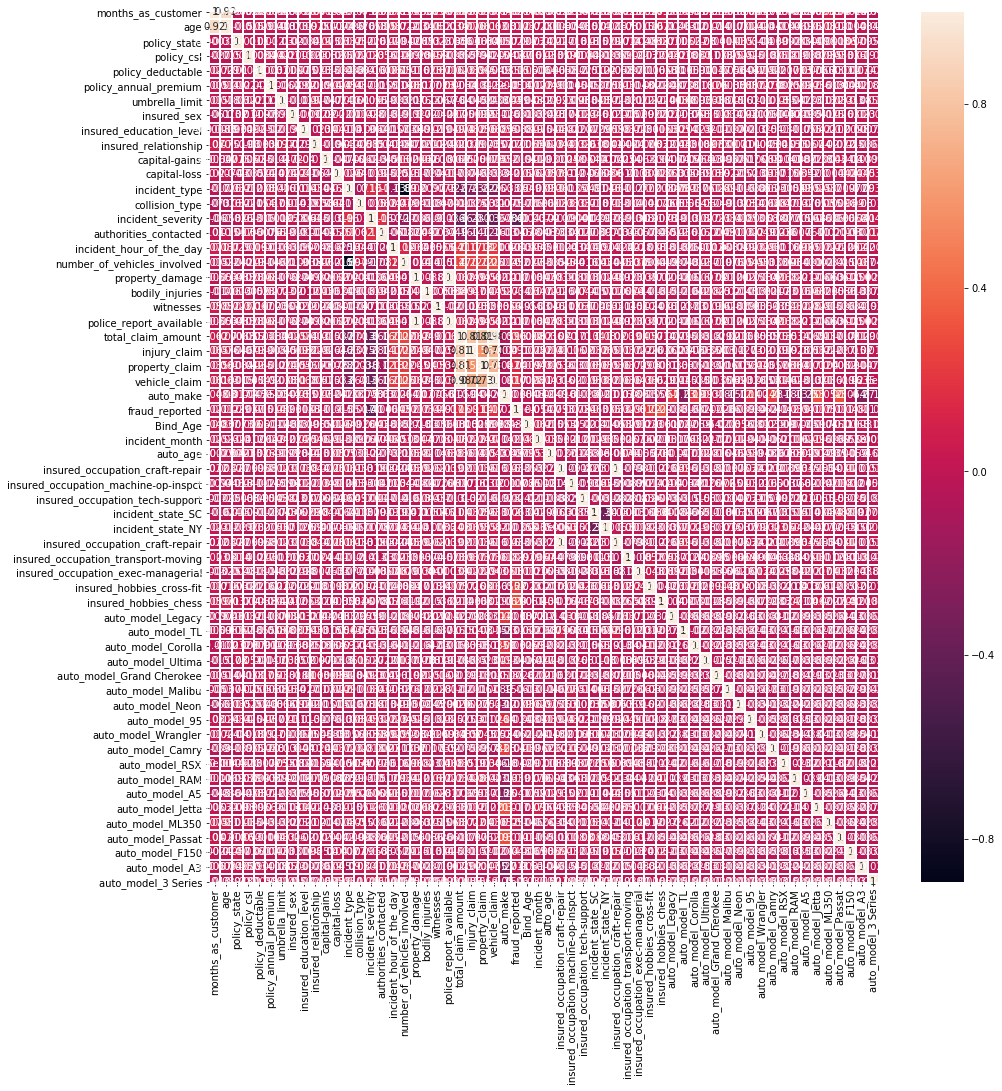

In [152]:
plt.figure(figsize=(15,16))
sns.heatmap(i_corr,annot=True,linewidth=1)
plt.show()

# Visualizing correlation of feature columns with label column.

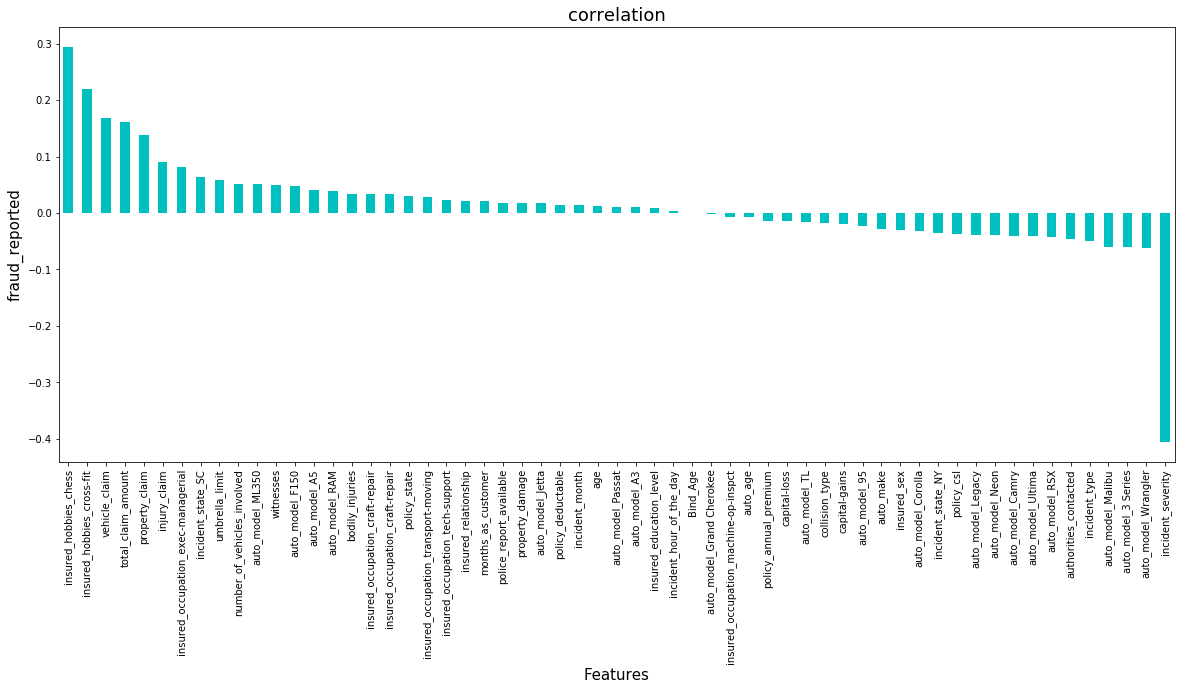

In [153]:
plt.figure(figsize = (20,8))
df.corr()['fraud_reported'].sort_values(ascending = False).drop(['fraud_reported']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('fraud_reported',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

Incident_severity hass the highest negative correlation with fraud_reported while, insured_hobbies_chess,insured_hobbies_cross-fit,vehicle_claim,total_claim_amount,property_claim have the highest positive correlation with fraud_reported



# Feature Selection

In [154]:
from sklearn.preprocessing import StandardScaler

In [155]:
X = df.drop(columns = ['fraud_reported'])
y = df['fraud_reported']

In [156]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

Checking for Multicollinearity using Variance Inflation Factor

In [157]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [158]:
vif = pd.DataFrame()

In [159]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [160]:
vif

,Features,vif
0,months_as_customer,7.009741e+00
1,age,7.007656e+00
2,policy_state,1.051162e+00
3,policy_csl,1.050328e+00
4,policy_deductable,1.051647e+00
5,policy_annual_premium,1.054938e+00
6,umbrella_limit,1.058391e+00
7,insured_sex,1.047010e+00
8,insured_education_level,1.064653e+00
9,insured_relationship,1.044353e+00


months_as_customer, age are highly multicollinear



# Principle Component Analysis

In [161]:
from sklearn.decomposition import PCA

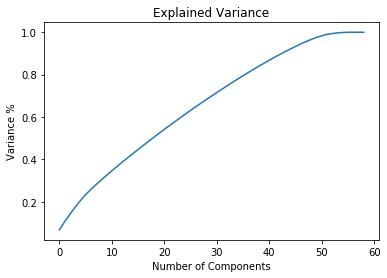

In [162]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

55 components explain around 95% variance in Data



# Selecting Kbest Features

In [163]:
from sklearn.feature_selection import SelectKBest, f_classif

In [164]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [165]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(60,'Score'))

                                 Feature       Score
14                     incident_severity  196.960603
39                 insured_hobbies_chess   95.024355
38             insured_hobbies_cross-fit   50.261031
25                         vehicle_claim   29.074270
22                    total_claim_amount   26.851969
24                        property_claim   19.327729
23                          injury_claim    8.328776
37    insured_occupation_exec-managerial    6.549513
33                     incident_state_SC    3.984111
48                   auto_model_Wrangler    3.866325
58                   auto_model_3 Series    3.617901
45                     auto_model_Malibu    3.599036
6                         umbrella_limit    3.441452
17           number_of_vehicles_involved    2.689100
54                      auto_model_ML350    2.570055
12                         incident_type    2.539153
20                             witnesses    2.451026
56                       auto_model_F150    2.

# Selecting best features based on their scores:

In [166]:
x_best = X.drop(columns=['Bind_Age','age']).copy()

In [167]:
scaled_x_best = scaler.fit_transform(x_best)

This is a Classification problem since Target/ Lable column ('fraud_reported') has Catergorical type of Data.

# Classification Model Building

Balancing out classes in Label column 'Churn' using SMOTE technique.

In [168]:
from imblearn.over_sampling import SMOTE as sm

In [169]:
smt_x,smt_y = sm().fit_resample(scaled_x_best,y)

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Finding the best random state

In [171]:
from sklearn.ensemble import RandomForestClassifier
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .31, random_state = i)
    modRF =  RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.9207708779443254 on random_state: 15


In [172]:
x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .31,random_state = 6)

In [173]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [175]:
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
XGBC= XGBClassifier()
adbc = AdaBoostClassifier()
LOGR= LogisticRegression(solver='liblinear')
SV =  SVC()
KNN = KNeighborsClassifier()

# Training the Models

In [176]:
RFC.fit(x_train,y_train.ravel())
XGBC.fit(x_train,y_train.ravel())
DTC.fit(x_train,y_train)
adbc.fit(x_train,y_train.ravel())
SV.fit(x_train,y_train.ravel())
LOGR.fit(x_train,y_train.ravel())
KNN.fit(x_train,y_train.ravel())

[15:47:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KNeighborsClassifier()

All Models have been trained.



# Logistic Regression Model Accuracy

In [177]:
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)

In [178]:
conf_matrx = confusion_matrix(y_test,LOGRpred)
conf_matrx

array([[193,  40],
       [ 38, 196]], dtype=int64)

In [179]:
print(accu)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       233
           1       0.83      0.84      0.83       234

    accuracy                           0.83       467
   macro avg       0.83      0.83      0.83       467
weighted avg       0.83      0.83      0.83       467



# Random Forest Classifier Model Accuracy


In [180]:
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)

In [181]:
conf_matrx = confusion_matrix(y_test,RFCpred)
conf_matrx

array([[205,  28],
       [ 25, 209]], dtype=int64)

In [182]:
print(accu)

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       233
           1       0.88      0.89      0.89       234

    accuracy                           0.89       467
   macro avg       0.89      0.89      0.89       467
weighted avg       0.89      0.89      0.89       467



# Decision Tree Classifier Model Accuracy

In [183]:
DTCpred = DTC.predict(x_test)
accu = classification_report(y_test,DTCpred)

In [184]:
conf_matrx = confusion_matrix(y_test,DTCpred)

In [185]:
conf_matrx

array([[202,  31],
       [ 31, 203]], dtype=int64)

In [186]:
print(accu)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       233
           1       0.87      0.87      0.87       234

    accuracy                           0.87       467
   macro avg       0.87      0.87      0.87       467
weighted avg       0.87      0.87      0.87       467



# XGB Classifier Model Accuracy

In [187]:
XGBCpred = XGBC.predict(x_test)
accu = classification_report(y_test,XGBCpred)

In [188]:
conf_matrx = confusion_matrix(y_test,XGBCpred)
conf_matrx

array([[206,  27],
       [ 22, 212]], dtype=int64)

In [189]:
print(accu)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       233
           1       0.89      0.91      0.90       234

    accuracy                           0.90       467
   macro avg       0.90      0.90      0.90       467
weighted avg       0.90      0.90      0.90       467



# AdaBoost Classifier Model Accuracy

In [190]:
adbcpred = adbc.predict(x_test)
accu = classification_report(y_test,adbcpred)

In [191]:
conf_matrx = confusion_matrix(y_test,adbcpred)
conf_matrx

array([[204,  29],
       [ 34, 200]], dtype=int64)

In [192]:
print(accu)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       233
           1       0.87      0.85      0.86       234

    accuracy                           0.87       467
   macro avg       0.87      0.87      0.87       467
weighted avg       0.87      0.87      0.87       467



# SV Classifier Model Accuracy

In [193]:
SVpred = SV.predict(x_test)
accu = classification_report(y_test,SVpred)
conf_matrx = confusion_matrix(y_test,SVpred)
conf_matrx

array([[208,  25],
       [ 23, 211]], dtype=int64)

In [194]:
print(accu)

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       233
           1       0.89      0.90      0.90       234

    accuracy                           0.90       467
   macro avg       0.90      0.90      0.90       467
weighted avg       0.90      0.90      0.90       467



# K Nearest Neighbours Classifier Model Accuracy

In [195]:
KNNpred = KNN.predict(x_test)
accu = classification_report(y_test,KNNpred)

In [196]:
conf_matrx = confusion_matrix(y_test,KNNpred)
conf_matrx

array([[144,  89],
       [ 18, 216]], dtype=int64)

In [197]:
print(accu)

              precision    recall  f1-score   support

           0       0.89      0.62      0.73       233
           1       0.71      0.92      0.80       234

    accuracy                           0.77       467
   macro avg       0.80      0.77      0.77       467
weighted avg       0.80      0.77      0.77       467



# Model Cross Validation

In [198]:
from sklearn.model_selection import cross_val_score as cvs

# Decision Tree Classifier

In [199]:
print(cvs(DTC,smt_x,smt_y,cv=5).mean())

0.8486875976326154


# Logistic Regression

In [200]:
print(cvs(LOGR,smt_x,smt_y,cv=5).mean())

0.8419814745550152


# Random Forest Classifier

In [201]:
print(cvs(RFC,smt_x,smt_y,cv=5).mean())

0.8838793425887219


# XGB Classifier

In [202]:
print(cvs(XGBC,smt_x,smt_y,cv=5).mean())

[15:47:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

#    Adaboost Classifier

In [203]:
print(cvs(adbc,smt_x,smt_y,cv=5).mean())

0.858687377615454


# SV Classifier

In [204]:
print(cvs(SV,smt_x,smt_y,cv=5).mean())

0.8937933158786386


# K Nearest Neighbours Classifier

In [205]:
print(cvs(KNN,smt_x,smt_y,cv=5).mean())

0.7629535103738092


Based on comparing Accuracy Score results, with Cross Validation results, it is determined that XGB Classifier and Random Forest Classifiers are the best models.

# ROC AUC Scores

# Logistic Regression

In [206]:
roc_auc_score(y_test,LOGRpred)

0.8329665089321742

# SV Classifier

In [207]:
roc_auc_score(y_test,SVpred)

0.8972066321851729

# Adaboost Classifier


In [208]:
roc_auc_score(y_test,adbcpred)

0.865118667693775

# XGB Classifier

In [209]:
roc_auc_score(y_test,XGBCpred)

0.8950515388283627

# Random Forest Classifier

In [210]:
roc_auc_score(y_test,RFCpred)

0.8864953596713253

# K Nearest Neighbours Classifier

In [211]:
roc_auc_score(y_test,KNNpred)

0.7705513370749424

# ROC AUC curves

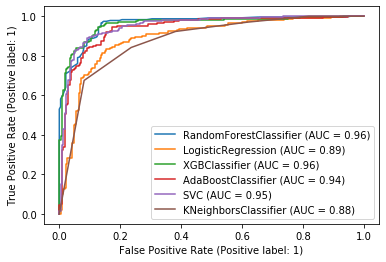

In [212]:
disp = plot_roc_curve(RFC,x_test,y_test)
mod = [LOGR,XGBC,adbc,SV,KNN]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

Based on the above graph and roc_auc_scores,XGB Classifier is the best model for the dataset, with AUC = 0.97 and roc_auc_score = 0.9036


# Hyper Parameter Tuning

# XGB Classifier

In [213]:
from sklearn.model_selection import GridSearchCV

In [214]:

parameter = {'booster':["gbtree","gblinear"],'eta': [0.01,0.1,0.2,0.3],'min_child_weight':np.arange(5),'max_depth':[10,20,40,60,80],'subsample':[0.5,1]}

In [215]:
GridCV = GridSearchCV(XGBClassifier(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [216]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[15:52:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [217]:
GridCV.best_params_

{'booster': 'gbtree',
 'eta': 0.2,
 'max_depth': 20,
 'min_child_weight': 0,
 'subsample': 0.5}

In [218]:
Best_mod1 = XGBClassifier(booster = 'gbtree',eta = 0.3, max_depth= 10, min_child_weight = 0,subsample = 0.5)
Best_mod1.fit(x_train,y_train)

[15:52:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=0, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [219]:
xgbpred = Best_mod1.predict(x_test)
acc = accuracy_score(y_test,xgbpred)
print(acc*100)

91.43468950749465


XGB Classifier has an accuracy of 91.43%

In [220]:
conf_matrx = confusion_matrix(y_test,xgbpred)
conf_matrx

array([[209,  24],
       [ 16, 218]], dtype=int64)

# Random Forest Classifier

In [221]:
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],'min_samples_leaf':[5,10,15,20,30],'min_samples_split':[2,5,10,20],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}

In [222]:
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [223]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 30],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [30, 50, 60]},
             verbose=1)

In [224]:
GridCV.best_params_

{'criterion': 'entropy',
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 60}

In [225]:
Best_mod2 = RandomForestClassifier(n_estimators = 50,criterion = 'entropy', max_depth= 20, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 2)
Best_mod2.fit(x_train,y_train)
rfpred = Best_mod2.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)

88.86509635974305


Random Forest Classifier has an accuracy of 88.86%

In [226]:
conf_matrx = confusion_matrix(y_test,rfpred)
conf_matrx

array([[204,  29],
       [ 23, 211]], dtype=int64)

On comparing the accuracies and confusion matrices of the 2 models it is determined that XGB classifier is the better model.

# Saving The Model

In [227]:
import joblib
joblib.dump(Best_mod1,"BestModelInsurance_Fraud.pkl")

['BestModelInsurance_Fraud.pkl']

# Loading The Model

In [228]:
mod=joblib.load("BestModelInsurance_Fraud.pkl")

In [229]:
print(mod.predict(x_test))

[0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0
 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0
 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1
 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1
 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1
 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1
 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0
 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0]


In [230]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x_test), 'Actual Values': y_test})
Prediction_accuracy.head(50)

,Predictions,Actual Values
24,0,0
1388,1,1
336,0,0
957,0,0
1398,1,1
1064,1,1
844,0,0
1463,1,1
846,0,0
231,0,0
